In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [123]:
pd.set_option('precision', 9)
df = pd.read_csv('epa-sea-level.csv', dtype=np.float)
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880.0,0.000000000,-0.952755905,0.952755905,NaN
1,1881.0,0.220472441,-0.732283464,1.173228345,NaN
2,1882.0,-0.440944881,-1.346456692,0.464566929,NaN
3,1883.0,-0.232283464,-1.129921259,0.665354330,NaN
4,1884.0,0.590551181,-0.283464567,1.464566928,NaN


In [124]:
df['CSIRO Adjusted Sea Level']

0      0.000000000
1      0.220472441
2     -0.440944881
3     -0.232283464
4      0.590551181
          ...     
129    8.586614164
130    8.901574794
131    8.964566920
132    9.326771644
133    8.980314951
Name: CSIRO Adjusted Sea Level, Length: 134, dtype: float64

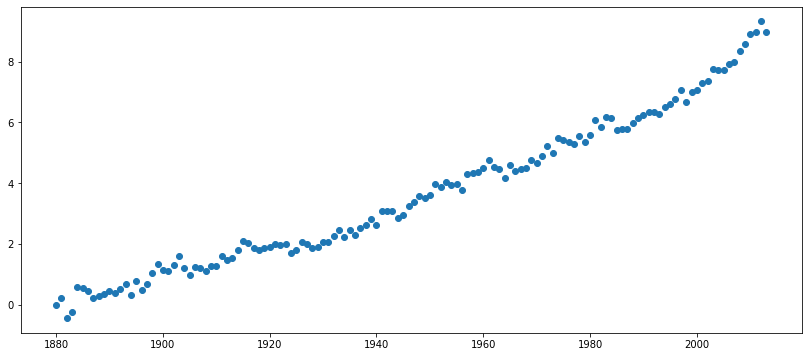

In [125]:
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

In [126]:
res = stats.linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
res.slope, res.intercept

(0.0630445840121348, -119.06594196773978)

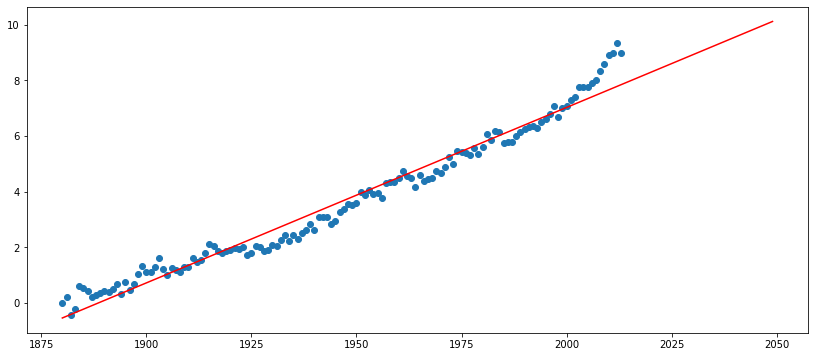

In [127]:
x_det = list(range(1880,2050))
y_det = list()
for year in x_det:
    y_det.append(year*res.slope + res.intercept)
ax.plot(x_det, y_det, 'r', label='From year 1880')
fig

In [128]:
df_from_2000 = df[df['Year'] >= 2000]
y_from_2000 = df_from_2000['CSIRO Adjusted Sea Level']
x_from_2000 = df_from_2000['Year']
df_from_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000.0,7.062992119,6.791338576,7.334645662,6.920582014
121,2001.0,7.287401567,7.019685032,7.555118103,7.087460011
122,2002.0,7.381889756,7.110236213,7.653543299,7.319697525
123,2003.0,7.759842512,7.484251961,8.035433063,7.488352718
124,2004.0,7.740157472,7.464566922,8.015748023,7.507932839
125,2005.0,7.744094480,7.472440937,8.015748023,7.644563144
126,2006.0,7.917322827,7.645669284,8.188976370,7.697420009
127,2007.0,7.996062984,7.712598417,8.279527551,7.702147150
128,2008.0,8.350393692,8.078740149,8.622047235,7.907365410
129,2009.0,8.586614164,8.311023614,8.862204715,8.046354090


In [129]:
res_2000 = stats.linregress(x_from_2000, y_from_2000)
res_2000.slope, res_2000.intercept

(0.16642727333186808, -325.79346680596467)

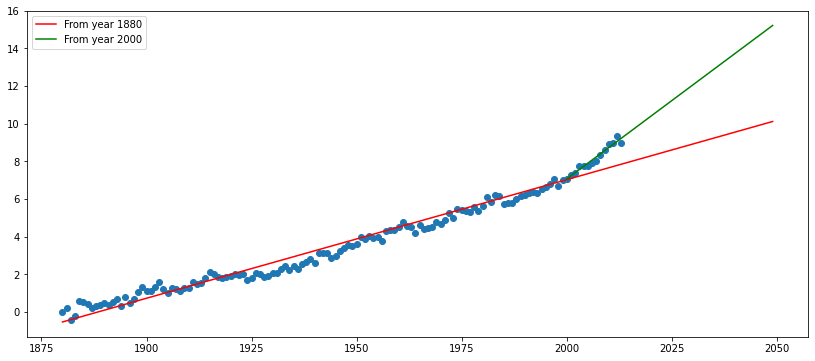

In [130]:
x_2000 = list(range(2000, 2050))
y_2000 = list()
for each in x_2000:
    y_2000.append((each*res_2000.slope + res_2000.intercept))
ax.plot(x_2000, y_2000, 'g', label='From year 2000')
ax.legend()
fig.savefig('sea_level_plot.png')
fig